In [72]:
import pandas as pd

import numpy as np

In [73]:
train_data = pd.read_csv('train.csv')

In [74]:
train_data.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [75]:
train_data.shape

(20000, 22)

In [76]:
train_data.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


In [77]:
for column in train_data.columns:
    unique_count = train_data[column].nunique()
    print(f"Column: {column}, Unique Values: {unique_count}")

Column: Location, Unique Values: 12399
Column: Cross_Street, Unique Values: 1495
Column: Latitude, Unique Values: 3622
Column: Longitude, Unique Values: 3578
Column: Date_Reported, Unique Values: 811
Column: Date_Occurred, Unique Values: 366
Column: Time_Occurred, Unique Values: 996
Column: Area_ID, Unique Values: 21
Column: Area_Name, Unique Values: 21
Column: Reporting_District_no, Unique Values: 1120
Column: Part 1-2, Unique Values: 2
Column: Modus_Operandi, Unique Values: 10489
Column: Victim_Age, Unique Values: 100
Column: Victim_Sex, Unique Values: 4
Column: Victim_Descent, Unique Values: 17
Column: Premise_Code, Unique Values: 217
Column: Premise_Description, Unique Values: 216
Column: Weapon_Used_Code, Unique Values: 57
Column: Weapon_Description, Unique Values: 57
Column: Status, Unique Values: 5
Column: Status_Description, Unique Values: 5
Column: Crime_Category, Unique Values: 6


In [78]:
a = list(train_data.columns)

In [79]:
for i in a :
  if train_data[i].isnull().sum() > 0 :
    print("Null values in " + i + " : " + str(train_data[i].isnull().sum()))

Null values in Cross_Street : 16552
Null values in Modus_Operandi : 2741
Null values in Victim_Sex : 2624
Null values in Victim_Descent : 2624
Null values in Premise_Description : 5
Null values in Weapon_Used_Code : 12665
Null values in Weapon_Description : 12665


In [80]:
import pandas as pd
null_premise_description_rows = train_data[train_data['Premise_Code'] == 418]

# Print the number of rows
print(f"Number of rows with null Premise_Description: {len(null_premise_description_rows)}")

# Pretty print the filtered data (if any)
if not null_premise_description_rows.empty:
    pd.set_option("display.max_rows", None)  # Display all rows
    pd.set_option("display.max_colwidth", None)  # Display full column width
    print("\nRows with null Premise_Description:")
    print(null_premise_description_rows.to_string())  # Convert to string for pretty printing
    pd.reset_option("display.max_rows")  # Reset display options
    pd.reset_option("display.max_colwidth")
else:
    print("\nNo rows with null Premise_Description found.")

Number of rows with null Premise_Description: 5

Rows with null Premise_Description:
                                      Location Cross_Street  Latitude  Longitude           Date_Reported           Date_Occurred  Time_Occurred  Area_ID    Area_Name  Reporting_District_no  Part 1-2                 Modus_Operandi  Victim_Age Victim_Sex Victim_Descent  Premise_Code Premise_Description  Weapon_Used_Code                              Weapon_Description Status Status_Description   Crime_Category
9884   5600    MELROSE                      AV          NaN   34.0853  -118.3277  04/08/2020 12:00:00 AM  04/07/2020 12:00:00 AM         1000.0      6.0    Hollywood                  676.0       2.0                 0400 0444 1822        62.0          M              O         418.0                 NaN             400.0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     IC        Invest Cont   Violent Crimes
11029  2100 W  SLAUSON                      AV          NaN   33.9891  -118.3158  06/24/2020 

In [81]:
b = list(train_data['Reporting_District_no'].unique())

len(b)

1120

In [82]:
train_data['Date_Occurred'] = pd.to_datetime(train_data['Date_Occurred'])
train_data['Date_Reported'] = pd.to_datetime(train_data['Date_Reported'])

C:\Users\Laddu\AppData\Local\Temp\ipykernel_7060\3660494536.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Date_Occurred'] = pd.to_datetime(train_data['Date_Occurred'])
C:\Users\Laddu\AppData\Local\Temp\ipykernel_7060\3660494536.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Date_Reported'] = pd.to_datetime(train_data['Date_Reported'])


In [83]:
train_data['Reported-Occured'] = train_data['Date_Reported'] - train_data['Date_Occurred']

In [84]:
train_data['Reported-Occured'] = train_data['Reported-Occured'].dt.days

In [85]:
train_data['Reported-Occured']

0        3
1        0
2        0
3        2
4        0
        ..
19995    0
19996    0
19997    0
19998    0
19999    1
Name: Reported-Occured, Length: 20000, dtype: int64

In [86]:
train_data['Reported-Occured'].value_counts().tail(25)

Reported-Occured
793     1
413     1
1029    1
720     1
1300    1
1100    1
765     1
582     1
700     1
1176    1
444     1
553     1
895     1
864     1
428     1
364     1
505     1
420     1
1024    1
409     1
1160    1
337     1
1005    1
519     1
228     1
Name: count, dtype: int64

In [87]:

new_order = ['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Reported-Occured', 'Time_Occurred',
             'Area_ID', 'Area_Name', 'Reporting_District_no', 'Part 1-2', 'Modus_Operandi',
             'Victim_Age', 'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Premise_Description',
             'Weapon_Used_Code', 'Weapon_Description', 'Status', 'Status_Description', 'Crime_Category']

train_data = train_data[new_order]

In [88]:
bins = ['00:00 - 05:59', '06:00-11:59', '12:00-17:59', '18:00 - 23:59']
labels = ['Night', 'Morning', 'Afternoon', 'Evening']

In [89]:
def convert_to_time(x):
  hours = int(x // 100)
  minutes = int(x % 100)
  return f"{hours:02d}:{minutes:02d}:00"


In [90]:
train_data['Time_Occurred'] = train_data['Time_Occurred'].apply(convert_to_time)

In [91]:
train_data['Time_Occurred']= pd.to_datetime(train_data['Time_Occurred'])

C:\Users\Laddu\AppData\Local\Temp\ipykernel_7060\4166443077.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['Time_Occurred']= pd.to_datetime(train_data['Time_Occurred'])


In [92]:
train_data['Time_Occurred']= pd.to_datetime(train_data['Time_Occurred'], format='%H:%M')
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']


hour = train_data['Time_Occurred'].dt.hour


train_data['Time_Occurred_Label'] = pd.cut(hour, bins=bins, labels=labels, right=False, include_lowest=True)

In [93]:
train_data['Time_Occurred'].dt.strftime('%H:%M')

0        18:00
1        13:45
2        06:05
3        18:00
4        11:30
         ...  
19995    07:00
19996    02:59
19997    14:00
19998    06:00
19999    18:00
Name: Time_Occurred, Length: 20000, dtype: object

In [94]:
train_data[['Crime_Category']].groupby(train_data['Part 1-2']).count()

,Crime_Category
Part 1-2,
1.0,11637
2.0,8363


In [95]:
train_data['Time_Occurred'] = pd.to_datetime(train_data['Time_Occurred']).dt.strftime('%H:%M')

In [96]:
Premise_details = dict(zip(train_data['Premise_Code'].unique(), train_data['Premise_Description'].unique()))

In [97]:
Area_details = dict(zip(train_data['Area_ID'].unique(), train_data['Area_Name'].unique()))

In [98]:
Status_Details = dict(zip(train_data['Status'].unique(), train_data['Status_Description'].unique()))

In [99]:
train_data.drop(['Area_Name','Premise_Description','Time_Occurred','Status_Description'], axis=1, inplace=True)

In [100]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               20000 non-null  object  
 1   Cross_Street           3448 non-null   object  
 2   Latitude               20000 non-null  float64 
 3   Longitude              20000 non-null  float64 
 4   Reported-Occured       20000 non-null  int64   
 5   Area_ID                20000 non-null  float64 
 6   Reporting_District_no  20000 non-null  float64 
 7   Part 1-2               20000 non-null  float64 
 8   Modus_Operandi         17259 non-null  object  
 9   Victim_Age             20000 non-null  float64 
 10  Victim_Sex             17376 non-null  object  
 11  Victim_Descent         17376 non-null  object  
 12  Premise_Code           20000 non-null  float64 
 13  Weapon_Used_Code       7335 non-null   float64 
 14  Weapon_Description     7335 non-null  

In [101]:
(train_data.groupby(['Part 1-2', 'Crime_Category']).size())

Part 1-2  Crime_Category               
1.0       Crimes against Persons             33
          Crimes against Public Order       331
          Property Crimes                  9658
          Violent Crimes                   1615
2.0       Crimes against Persons            192
          Crimes against Public Order      1477
          Fraud and White-Collar Crimes    1355
          Other Crimes                      179
          Property Crimes                  2008
          Violent Crimes                   3152
dtype: int64

In [102]:
print(pd.crosstab(train_data['Status'], train_data['Crime_Category']))

Crime_Category  Crimes against Persons  Crimes against Public Order  \
Status                                                                
AA                                  69                          323   
AO                                  80                          465   
IC                                  74                         1011   
JA                                   1                            6   
JO                                   1                            3   

Crime_Category  Fraud and White-Collar Crimes  Other Crimes  Property Crimes  \
Status                                                                         
AA                                         38            33              753   
AO                                         37            28              550   
IC                                       1279           117            10320   
JA                                          0             1               35   
JO                    

In [103]:
bins = [0,15,180,365,float('inf')]
labels = ['Within 15 days','15 days to 6 months','6 months to 1 year', 'greater than 1 year']
train_data['Reported_bins'] = pd.cut(train_data['Reported-Occured'], bins=bins, labels=labels, right=False, include_lowest=True)

In [104]:
train_data['Reported_bins'].value_counts()

Reported_bins
Within 15 days         18045
15 days to 6 months     1368
greater than 1 year      395
6 months to 1 year       192
Name: count, dtype: int64

In [105]:
(train_data.groupby(['Reported_bins', 'Crime_Category']).size())

C:\Users\Laddu\AppData\Local\Temp\ipykernel_7060\3647776124.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (train_data.groupby(['Reported_bins', 'Crime_Category']).size())


Reported_bins        Crime_Category               
Within 15 days       Crimes against Persons             171
                     Crimes against Public Order       1705
                     Fraud and White-Collar Crimes      630
                     Other Crimes                       169
                     Property Crimes                  10788
                     Violent Crimes                    4582
15 days to 6 months  Crimes against Persons              21
                     Crimes against Public Order         65
                     Fraud and White-Collar Crimes      421
                     Other Crimes                         9
                     Property Crimes                    748
                     Violent Crimes                     104
6 months to 1 year   Crimes against Persons              14
                     Crimes against Public Order         19
                     Fraud and White-Collar Crimes       82
                     Other Crimes                

In [106]:
(train_data.groupby(['Reported_bins', 'Time_Occurred_Label']).size())

C:\Users\Laddu\AppData\Local\Temp\ipykernel_7060\1485896072.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (train_data.groupby(['Reported_bins', 'Time_Occurred_Label']).size())


Reported_bins        Time_Occurred_Label
Within 15 days       Night                  2698
                     Morning                3520
                     Afternoon              5840
                     Evening                5987
15 days to 6 months  Night                   164
                     Morning                 341
                     Afternoon               583
                     Evening                 280
6 months to 1 year   Night                    35
                     Morning                  39
                     Afternoon                84
                     Evening                  34
greater than 1 year  Night                    64
                     Morning                  94
                     Afternoon               176
                     Evening                  61
dtype: int64

In [107]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               20000 non-null  object  
 1   Cross_Street           3448 non-null   object  
 2   Latitude               20000 non-null  float64 
 3   Longitude              20000 non-null  float64 
 4   Reported-Occured       20000 non-null  int64   
 5   Area_ID                20000 non-null  float64 
 6   Reporting_District_no  20000 non-null  float64 
 7   Part 1-2               20000 non-null  float64 
 8   Modus_Operandi         17259 non-null  object  
 9   Victim_Age             20000 non-null  float64 
 10  Victim_Sex             17376 non-null  object  
 11  Victim_Descent         17376 non-null  object  
 12  Premise_Code           20000 non-null  float64 
 13  Weapon_Used_Code       7335 non-null   float64 
 14  Weapon_Description     7335 non-null  

In [108]:
a = list(train_data.columns)

In [109]:
for i in a :
  if train_data[i].isnull().sum() > 0 :
    print("Null values in " + i + " : " + str(train_data[i].isnull().sum()))

Null values in Cross_Street : 16552
Null values in Modus_Operandi : 2741
Null values in Victim_Sex : 2624
Null values in Victim_Descent : 2624
Null values in Weapon_Used_Code : 12665
Null values in Weapon_Description : 12665


In [110]:
train_data['Cross_Street'].fillna("Unknown", inplace=True)

C:\Users\Laddu\AppData\Local\Temp\ipykernel_7060\1731916608.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Cross_Street'].fillna("Unknown", inplace=True)


In [111]:
# Create a dictionary mapping Weapon_Used_Code to Weapon_Description
weapon_mapping = dict(zip(train_data['Weapon_Used_Code'], train_data['Weapon_Description']))

# Print the mapping dictionary
print(weapon_mapping)

{nan: nan, 400.0: 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)', nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, 511.0: 'VERBAL THREAT', nan: nan, 207.0: 'OTHER KNIFE', 102.0: 'HAND GUN', nan: nan, nan: nan, 500.0: 'UNKNOWN WEAPON/OTHER WEAPON', nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, 307.0: 'VEHICLE', nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, 506.0: 'FIRE', nan: nan, 312.0: 'PIPE/METAL PIPE', nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, nan: nan, 200.0: 'KNIFE WITH BLADE 6INCHES OR LESS', nan: nan, nan: nan, 302.0: 'BLUNT INSTRUMENT', nan: nan, nan: nan, nan: nan, 304.0: 'CLUB/BAT', nan: nan, n

In [112]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               20000 non-null  object  
 1   Cross_Street           20000 non-null  object  
 2   Latitude               20000 non-null  float64 
 3   Longitude              20000 non-null  float64 
 4   Reported-Occured       20000 non-null  int64   
 5   Area_ID                20000 non-null  float64 
 6   Reporting_District_no  20000 non-null  float64 
 7   Part 1-2               20000 non-null  float64 
 8   Modus_Operandi         17259 non-null  object  
 9   Victim_Age             20000 non-null  float64 
 10  Victim_Sex             17376 non-null  object  
 11  Victim_Descent         17376 non-null  object  
 12  Premise_Code           20000 non-null  float64 
 13  Weapon_Used_Code       7335 non-null   float64 
 14  Weapon_Description     7335 non-null  

In [113]:
mode_modus_operandi = train_data['Modus_Operandi'].mode()[0]

print(f"Mode of Modus_Operandi: {mode_modus_operandi}")

Mode of Modus_Operandi: 0344


In [114]:
train_data['Modus_Operandi']

0                                           0385
1        0906 0352 0371 0446 1822 0344 0416 0417
2                                      0329 1202
3                                      0329 1300
4                  0416 0945 1822 0400 0417 0344
                          ...                   
19995                        0416 0446 2004 0913
19996                   1822 0209 0344 1414 1420
19997                             0344 1822 1420
19998              1202 2038 0913 0602 1242 0553
19999                                        NaN
Name: Modus_Operandi, Length: 20000, dtype: object

In [115]:
unknown_modus_operandi_rows = train_data[train_data['Modus_Operandi'].isna()]

# Print the number of rows
print(f"Number of rows with Unknown Modus_Operandi: {len(unknown_modus_operandi_rows)}")

# Optionally, display the filtered data
print(unknown_modus_operandi_rows)  # Uncomment to see the rows

Number of rows with Unknown Modus_Operandi: 2741
                                       Location  \
8       5500    COLDWATER CA                 AV   
12       100    THE GROVE                    DR   
15      3000    JOHNSTON                     ST   
18      3200    GRAND VIEW                   BL   
22     16700 W  VENTURA                      BL   
...                                         ...   
19987  16600    VICTORY                      BL   
19989  22100    GRESHAM                      ST   
19991   3900    BERRYMAN                     AV   
19993   2500    CRENSHAW                     BL   
19999           DALTON                       AV   

                          Cross_Street  Latitude  Longitude  Reported-Occured  \
8                              Unknown   34.1781  -118.4179                 2   
12                             Unknown   34.0761  -118.3563                 0   
15                             Unknown   34.0805  -118.2087                 0   
18            

In [116]:
unknown_modus_operandi_rows = train_data[train_data['Modus_Operandi'].isna()]
unique_weapon_descriptions = unknown_modus_operandi_rows['Weapon_Description'].unique()

print("Unique Weapon Descriptions for Unknown Modus_Operandi:")
print(unique_weapon_descriptions)

Unique Weapon Descriptions for Unknown Modus_Operandi:
[nan 'ROCK/THROWN OBJECT' 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)'
 'MACE/PEPPER SPRAY' 'VERBAL THREAT' 'FIRE' 'VEHICLE' 'OTHER KNIFE'
 'UNKNOWN WEAPON/OTHER WEAPON']


In [117]:
for i in a :
  if train_data[i].isnull().sum() > 0 :
    print("Null values in " + i + " : " + str(train_data[i].isnull().sum()))

Null values in Modus_Operandi : 2741
Null values in Victim_Sex : 2624
Null values in Victim_Descent : 2624
Null values in Weapon_Used_Code : 12665
Null values in Weapon_Description : 12665


In [118]:
# Group by 'Crime_Category' and get the mode of 'Victim_Sex' for each group
mode_victim_sex_by_category = train_data.groupby('Crime_Category')['Victim_Sex'].agg(lambda x: x.mode()[0])

# Impute missing values in 'Victim_Sex' based on the mode for the corresponding 'Crime_Category'
for category, mode_sex in mode_victim_sex_by_category.items():
    train_data.loc[(train_data['Crime_Category'] == category) & (train_data['Victim_Sex'].isnull()), 'Victim_Sex'] = mode_sex

# Verify if there are still any null values in 'Victim_Sex'
print("Null values in Victim_Sex after imputation:", train_data['Victim_Sex'].isnull().sum())

Null values in Victim_Sex after imputation: 0


In [119]:
# Group by 'Crime_Category' and 'Victim_Sex', then get the mode of 'Victim_Descent'
mode_descent_by_category_sex = train_data.groupby(['Crime_Category', 'Victim_Sex'])['Victim_Descent'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)  # Handle cases where mode is empty


# Impute missing values in 'Victim_Descent' based on the mode for the corresponding 'Crime_Category' and 'Victim_Sex'
for (category, sex), mode_descent in mode_descent_by_category_sex.items():
    if not pd.isnull(mode_descent):  # Check if mode_descent is not NaN
        train_data.loc[(train_data['Crime_Category'] == category) & (train_data['Victim_Sex'] == sex) & (train_data['Victim_Descent'].isnull()), 'Victim_Descent'] = mode_descent

# Verify if there are still any null values in 'Victim_Descent'
print("Null values in Victim_Descent after imputation:", train_data['Victim_Descent'].isnull().sum())

Null values in Victim_Descent after imputation: 0


In [120]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               20000 non-null  object  
 1   Cross_Street           20000 non-null  object  
 2   Latitude               20000 non-null  float64 
 3   Longitude              20000 non-null  float64 
 4   Reported-Occured       20000 non-null  int64   
 5   Area_ID                20000 non-null  float64 
 6   Reporting_District_no  20000 non-null  float64 
 7   Part 1-2               20000 non-null  float64 
 8   Modus_Operandi         17259 non-null  object  
 9   Victim_Age             20000 non-null  float64 
 10  Victim_Sex             20000 non-null  object  
 11  Victim_Descent         20000 non-null  object  
 12  Premise_Code           20000 non-null  float64 
 13  Weapon_Used_Code       7335 non-null   float64 
 14  Weapon_Description     7335 non-null  

In [121]:
# Convert columns to categorical in the original DataFrame
columns_to_convert = ['Area_ID', 'Reporting_District_no', 'Modus_Operandi', 'Premise_Code','Weapon_Used_Code','Part 1-2']
for column in columns_to_convert:
    train_data[column] = (train_data[column].astype('object'))

# Verify the data types
print(train_data.dtypes)

Location                   object
Cross_Street               object
Latitude                  float64
Longitude                 float64
Reported-Occured            int64
Area_ID                    object
Reporting_District_no      object
Part 1-2                   object
Modus_Operandi             object
Victim_Age                float64
Victim_Sex                 object
Victim_Descent             object
Premise_Code               object
Weapon_Used_Code           object
Weapon_Description         object
Status                     object
Crime_Category             object
Time_Occurred_Label      category
Reported_bins            category
dtype: object


In [122]:
import copy
import numpy as np
import pandas as pd

# Create three copies of the dataset
train_data_zero_impute = copy.deepcopy(train_data)
train_data_mode_impute = copy.deepcopy(train_data)
train_data_as_is = copy.deepcopy(train_data)

# Impute with 0 in train_data_zero_impute
train_data_zero_impute['Weapon_Used_Code'].fillna(0, inplace=True)

# Impute with mode category-wise in train_data_mode_impute
mode_weapon_by_category = train_data.groupby('Crime_Category')['Weapon_Used_Code'].agg(
    lambda x: x.mode()[0] if not x.mode().empty else np.nan
)

for category, mode_weapon in mode_weapon_by_category.items():
    if not pd.isnull(mode_weapon):
        # Fill nulls with the mode for the specific category
        train_data_mode_impute.loc[
            (train_data_mode_impute['Crime_Category'] == category) &
            (train_data_mode_impute['Weapon_Used_Code'].isnull()),
            'Weapon_Used_Code'
        ] = mode_weapon

# train_data_as_is remains as is (no imputation)

# Verify the imputation
print("Null values in Weapon_Used_Code (zero impute):", train_data_zero_impute['Weapon_Used_Code'].isnull().sum())
print("Null values in Weapon_Used_Code (mode impute):", train_data_mode_impute['Weapon_Used_Code'].isnull().sum())
print("Null values in Weapon_Used_Code (as is):", train_data_as_is['Weapon_Used_Code'].isnull().sum())

Null values in Weapon_Used_Code (zero impute): 0
Null values in Weapon_Used_Code (mode impute): 0
Null values in Weapon_Used_Code (as is): 12665


C:\Users\Laddu\AppData\Local\Temp\ipykernel_7060\3162489768.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data_zero_impute['Weapon_Used_Code'].fillna(0, inplace=True)
C:\Users\Laddu\AppData\Local\Temp\ipykernel_7060\3162489768.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data_zero_imp

In [123]:
# Group by 'Crime_Category' and get the mode of 'Modus_Operandi' for each group
mode_modus_operandi_by_category = train_data.groupby('Area_ID')['Modus_Operandi'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'N/A') # Handle empty modes

# Display the results
print(mode_modus_operandi_by_category)

Area_ID
1.0          0329
2.0          0329
3.0     0329 1300
4.0          0344
5.0          0344
6.0          0344
7.0          0344
8.0     0344 0346
9.0          0344
10.0    0329 1822
11.0         0344
12.0         0329
13.0         0344
14.0         0344
15.0         0344
16.0         0344
17.0         0344
18.0    0329 1822
19.0         0329
20.0    1822 0329
21.0         0329
Name: Modus_Operandi, dtype: object


In [124]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               20000 non-null  object  
 1   Cross_Street           20000 non-null  object  
 2   Latitude               20000 non-null  float64 
 3   Longitude              20000 non-null  float64 
 4   Reported-Occured       20000 non-null  int64   
 5   Area_ID                20000 non-null  object  
 6   Reporting_District_no  20000 non-null  object  
 7   Part 1-2               20000 non-null  object  
 8   Modus_Operandi         17259 non-null  object  
 9   Victim_Age             20000 non-null  float64 
 10  Victim_Sex             20000 non-null  object  
 11  Victim_Descent         20000 non-null  object  
 12  Premise_Code           20000 non-null  object  
 13  Weapon_Used_Code       7335 non-null   object  
 14  Weapon_Description     7335 non-null  

In [125]:
final_columns = ['Location', 'Reported-Occured', 'Area_ID', 'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age', 'Victim_Sex', 'Victim_Descent', 'Premise_Code','Weapon_Used_Code', 'Status', 'Reported_bins','Time_Occurred_Label','Crime_Category']

In [126]:
# Calculate the mean age for each crime category (excluding negative ages)
mean_age_by_category = train_data_mode_impute[train_data_mode_impute['Victim_Age'] >= 0].groupby('Crime_Category')['Victim_Age'].mean()

# Impute negative ages with the mean for their respective category
for category, mean_age in mean_age_by_category.items():
    train_data_mode_impute.loc[(train_data_mode_impute['Victim_Age'] < 0) & (train_data_mode_impute['Crime_Category'] == category), 'Victim_Age'] = mean_age

# Verify the imputation
print("Null values in Victim_Age after imputation:", train_data_mode_impute['Victim_Age'].isnull().sum())
print("Number of Victim Age values less than 0:", (train_data_mode_impute['Victim_Age'] < 0).sum())

Null values in Victim_Age after imputation: 0
Number of Victim Age values less than 0: 0


In [127]:
# Group by 'Area_ID' and get the mode of 'Modus_Operandi' for each group
mode_modus_operandi_by_area = train_data_mode_impute.groupby('Area_ID')['Modus_Operandi'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'N/A')  # Handle empty modes

# Impute missing values in 'Modus_Operandi' based on the mode for the corresponding 'Area_ID'
for area_id, mode_modus in mode_modus_operandi_by_area.items():
    train_data_mode_impute.loc[(train_data_mode_impute['Modus_Operandi'].isnull()) & (train_data_mode_impute['Area_ID'] == area_id), 'Modus_Operandi'] = mode_modus

# Verify if there are still any null values in 'Modus_Operandi'
print("Null values in Modus_Operandi after imputation:", train_data_mode_impute['Modus_Operandi'].isnull().sum())

Null values in Modus_Operandi after imputation: 0


In [128]:
selected_data = train_data_mode_impute[final_columns]

In [129]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               20000 non-null  object  
 1   Reported-Occured       20000 non-null  int64   
 2   Area_ID                20000 non-null  object  
 3   Reporting_District_no  20000 non-null  object  
 4   Part 1-2               20000 non-null  object  
 5   Modus_Operandi         20000 non-null  object  
 6   Victim_Age             20000 non-null  float64 
 7   Victim_Sex             20000 non-null  object  
 8   Victim_Descent         20000 non-null  object  
 9   Premise_Code           20000 non-null  object  
 10  Weapon_Used_Code       20000 non-null  object  
 11  Status                 20000 non-null  object  
 12  Reported_bins          20000 non-null  category
 13  Time_Occurred_Label    20000 non-null  category
 14  Crime_Category         20000 non-null 

In [130]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Define feature groups
categorical_high_card = ['Location', 'Modus_Operandi']
categorical_moderate_card = ['Reporting_District_no', 'Premise_Code']
categorical_low_card = ['Area_ID', 'Victim_Sex', 'Victim_Descent',
                        'Weapon_Used_Code', 'Status', 'Reported_bins', 'Time_Occurred_Label']
numerical_features = ['Reported-Occured', 'Victim_Age']
ordinal_feature = ['Part 1-2']
target_feature = 'Crime_Category'

# Encode target variable
label_encoder = LabelEncoder()
selected_data[target_feature] = label_encoder.fit_transform(selected_data[target_feature])

# Frequency encoding for high-cardinality features
for col in categorical_high_card:
    freq_encoding = selected_data[col].value_counts().to_dict()
    selected_data[col] = selected_data[col].map(freq_encoding)

# Preprocessing pipelines
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
numerical_transformer = StandardScaler()
ordinal_transformer = OrdinalEncoder()  # Specify the order explicitly

# Combine transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('ord', ordinal_transformer, ordinal_feature),
        ('cat_moderate', categorical_transformer, categorical_moderate_card),
        ('cat_low', categorical_transformer, categorical_low_card)
    ],
    remainder='passthrough'  # Keeps frequency-encoded high-cardinality features
)

# Apply transformations
X = selected_data.drop(columns=[target_feature])
y = selected_data[target_feature]

X_processed = preprocessor.fit_transform(X)

# X_processed is ready for training

C:\Users\Laddu\AppData\Local\Temp\ipykernel_7060\3336009324.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[target_feature] = label_encoder.fit_transform(selected_data[target_feature])
C:\Users\Laddu\AppData\Local\Temp\ipykernel_7060\3336009324.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[col] = selected_data[col].map(freq_encoding)
C:\Users\Laddu\AppData\Local\Temp\ipykernel_7060\3336009324.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

**Impute with Zero**

In [131]:
# Group by 'Area_ID' and get the mode of 'Modus_Operandi' for each group
mode_modus_operandi_by_area = train_data_zero_impute.groupby('Area_ID')['Modus_Operandi'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'N/A')  # Handle empty modes

# Impute missing values in 'Modus_Operandi' based on the mode for the corresponding 'Area_ID'
for area_id, mode_modus in mode_modus_operandi_by_area.items():
    train_data_zero_impute.loc[(train_data_zero_impute['Modus_Operandi'].isnull()) & (train_data_zero_impute['Area_ID'] == area_id), 'Modus_Operandi'] = mode_modus

# Verify if there are still any null values in 'Modus_Operandi'
print("Null values in Modus_Operandi after imputation:", train_data_zero_impute['Modus_Operandi'].isnull().sum())

Null values in Modus_Operandi after imputation: 0


In [132]:
# Calculate the mean age for each crime category (excluding negative ages)
mean_age_by_category = train_data_zero_impute[train_data_zero_impute['Victim_Age'] >= 0].groupby('Crime_Category')['Victim_Age'].mean()

# Impute negative ages with the mean for their respective category
for category, mean_age in mean_age_by_category.items():
    train_data_zero_impute.loc[(train_data_zero_impute['Victim_Age'] < 0) & (train_data_zero_impute['Crime_Category'] == category), 'Victim_Age'] = mean_age

# Verify the imputation
print("Null values in Victim_Age after imputation:", train_data_zero_impute['Victim_Age'].isnull().sum())
print("Number of Victim Age values less than 0:", (train_data_zero_impute['Victim_Age'] < 0).sum())

Null values in Victim_Age after imputation: 0
Number of Victim Age values less than 0: 0


In [133]:
selected_data_zero_impute = train_data_zero_impute[final_columns]

In [134]:
selected_data_zero_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               20000 non-null  object  
 1   Reported-Occured       20000 non-null  int64   
 2   Area_ID                20000 non-null  object  
 3   Reporting_District_no  20000 non-null  object  
 4   Part 1-2               20000 non-null  object  
 5   Modus_Operandi         20000 non-null  object  
 6   Victim_Age             20000 non-null  float64 
 7   Victim_Sex             20000 non-null  object  
 8   Victim_Descent         20000 non-null  object  
 9   Premise_Code           20000 non-null  object  
 10  Weapon_Used_Code       20000 non-null  float64 
 11  Status                 20000 non-null  object  
 12  Reported_bins          20000 non-null  category
 13  Time_Occurred_Label    20000 non-null  category
 14  Crime_Category         20000 non-null 

In [135]:
selected_data_zero_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               20000 non-null  object  
 1   Reported-Occured       20000 non-null  int64   
 2   Area_ID                20000 non-null  object  
 3   Reporting_District_no  20000 non-null  object  
 4   Part 1-2               20000 non-null  object  
 5   Modus_Operandi         20000 non-null  object  
 6   Victim_Age             20000 non-null  float64 
 7   Victim_Sex             20000 non-null  object  
 8   Victim_Descent         20000 non-null  object  
 9   Premise_Code           20000 non-null  object  
 10  Weapon_Used_Code       20000 non-null  float64 
 11  Status                 20000 non-null  object  
 12  Reported_bins          20000 non-null  category
 13  Time_Occurred_Label    20000 non-null  category
 14  Crime_Category         20000 non-null 

In [136]:
import pandas as pd

# Assuming 'train_data' is your DataFrame and 'location' is the column to be cleaned


# Step 1: Strip leading/trailing spaces and replace multiple spaces with a single space
selected_data_zero_impute['Location'] = selected_data_zero_impute['Location'].str.strip()  # Remove leading/trailing spaces
selected_data_zero_impute['Location'] = selected_data_zero_impute['Location'].str.replace(r'\s+', ' ', regex=True)  # Replace multiple spaces with one

# Step 2: Convert all text to lowercase for uniformity (to handle case inconsistencies)
selected_data_zero_impute['Location'] = selected_data_zero_impute['Location'].str.lower()

# Step 3: Capitalize the first letter of each word (title case)
selected_data_zero_impute['Location'] = selected_data_zero_impute['Location'].str.title()

# Step 4: If needed, replace specific known abbreviations or text patterns
# Example: Replace "Av" with "Ave"
#train_data['location'] = train_data['location'].str.replace(' Av', ' Ave')

# Display the cleaned 'location' column
print(selected_data_zero_impute['Location'])


0                     4500 Carpenter Av
1                               45Th St
2        600 E Martin Luther King Jr Bl
3                   14900 Oro Grande St
4                     7100 S Vermont Av
                      ...              
19995                   5100 W Adams Bl
19996                   16900 Roscoe Bl
19997              1000 S Shenandoah St
19998                300 W Sepulveda St
19999                         Dalton Av
Name: Location, Length: 20000, dtype: object


C:\Users\Laddu\AppData\Local\Temp\ipykernel_7060\2780723967.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_zero_impute['Location'] = selected_data_zero_impute['Location'].str.strip()  # Remove leading/trailing spaces
C:\Users\Laddu\AppData\Local\Temp\ipykernel_7060\2780723967.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_zero_impute['Location'] = selected_data_zero_impute['Location'].str.replace(r'\s+', ' ', regex=True)  # Replace multiple spaces with one
C:\Users\Ladd

In [137]:
'''from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
import pandas as pd

# Define feature groups
categorical_high_card = ['Location', 'Modus_Operandi']
categorical_moderate_card = ['Reporting_District_no', 'Premise_Code']
categorical_low_card = ['Area_ID', 'Victim_Sex', 'Victim_Descent', 
                        'Weapon_Used_Code', 'Status', 'Reported_bins', 'Time_Occurred_Label']
numerical_features = ['Reported-Occured', 'Victim_Age']
ordinal_feature = ['Part 1-2']
target_feature = 'Crime_Category'

# Encode target variable
label_encoder = LabelEncoder()
selected_data_zero_impute[target_feature] = label_encoder.fit_transform(selected_data_zero_impute[target_feature])

# Target Encoding for High Cardinality Features
target_encoder = TargetEncoder()
for col in categorical_high_card:
    selected_data_zero_impute[col] = target_encoder.fit_transform(selected_data_zero_impute[col], selected_data_zero_impute[target_feature])

# Preprocessing pipelines
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
numerical_transformer = StandardScaler()
ordinal_transformer = OrdinalEncoder()  # Specify the order explicitly

# Combine transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('ord', ordinal_transformer, ordinal_feature),
        ('cat_moderate', categorical_transformer, categorical_moderate_card),
        ('cat_low', categorical_transformer, categorical_low_card)
    ],
    remainder='passthrough'  # Keeps target-encoded high-cardinality features
)

# Apply transformations
X = selected_data_zero_impute.drop(columns=[target_feature])
y = selected_data_zero_impute[target_feature]

X_processed = preprocessor.fit_transform(X)'''


"from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder\nfrom sklearn.compose import ColumnTransformer\nfrom category_encoders import TargetEncoder\nimport pandas as pd\n\n# Define feature groups\ncategorical_high_card = ['Location', 'Modus_Operandi']\ncategorical_moderate_card = ['Reporting_District_no', 'Premise_Code']\ncategorical_low_card = ['Area_ID', 'Victim_Sex', 'Victim_Descent', \n                        'Weapon_Used_Code', 'Status', 'Reported_bins', 'Time_Occurred_Label']\nnumerical_features = ['Reported-Occured', 'Victim_Age']\nordinal_feature = ['Part 1-2']\ntarget_feature = 'Crime_Category'\n\n# Encode target variable\nlabel_encoder = LabelEncoder()\nselected_data_zero_impute[target_feature] = label_encoder.fit_transform(selected_data_zero_impute[target_feature])\n\n# Target Encoding for High Cardinality Features\ntarget_encoder = TargetEncoder()\nfor col in categorical_high_card:\n    selected_data_zero_impute[col] = target_encoder.f

In [139]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

# Define feature groups
categorical_high_card = ['Location', 'Modus_Operandi']
categorical_moderate_card = ['Reporting_District_no', 'Premise_Code']
categorical_low_card = ['Area_ID', 'Victim_Sex', 'Victim_Descent', 
                        'Weapon_Used_Code', 'Status', 'Reported_bins', 'Time_Occurred_Label']
numerical_features = ['Reported-Occured', 'Victim_Age']
ordinal_feature = ['Part 1-2']
target_feature = 'Crime_Category'

selected_data_zero_impute.head()
selected_data_zero_impute.info()
# Split the dataset into training and testing sets first
X = selected_data_zero_impute.drop(columns=[target_feature])
X.head()
X.info()
y = selected_data_zero_impute[target_feature]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Target Encoding for High Cardinality Features (on the training set)
target_encoder = TargetEncoder()
for col in categorical_high_card:
    X_train[col] = target_encoder.fit_transform(X_train[col], y_train)
    X_test[col] = target_encoder.transform(X_test[col])  # Apply the encoding on the test set

# Preprocessing pipelines
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
numerical_transformer = StandardScaler()
ordinal_transformer = OrdinalEncoder()  # Specify the order explicitly if necessary

# Combine transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('ord', ordinal_transformer, ordinal_feature),
        ('cat_moderate', categorical_transformer, categorical_moderate_card),
        ('cat_low', categorical_transformer, categorical_low_card)
    ],
    remainder='passthrough'  # Keeps the target-encoded high-cardinality features in the transformed data
)

# Apply transformations to both the training and testing sets
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Check the processed data
print("Processed training data shape:", X_train_processed.shape)
print("Processed test data shape:", X_test_processed.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               20000 non-null  object  
 1   Reported-Occured       20000 non-null  int64   
 2   Area_ID                20000 non-null  object  
 3   Reporting_District_no  20000 non-null  object  
 4   Part 1-2               20000 non-null  object  
 5   Modus_Operandi         20000 non-null  object  
 6   Victim_Age             20000 non-null  float64 
 7   Victim_Sex             20000 non-null  object  
 8   Victim_Descent         20000 non-null  object  
 9   Premise_Code           20000 non-null  object  
 10  Weapon_Used_Code       20000 non-null  float64 
 11  Status                 20000 non-null  object  
 12  Reported_bins          20000 non-null  category
 13  Time_Occurred_Label    20000 non-null  category
 14  Crime_Category         20000 non-null 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007950 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1409
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 389
[LightGBM] [Info] Start training from score -4.417654
[LightGBM] [Info] Start training from score -2.412121
[LightGBM] [Info] Start training from score -2.688248
[LightGBM] [Info] Start training from score -4.710531
[LightGBM] [Info] Start training from score -0.535823
[LightGBM] [Info] Start training from score -1.443394
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further spli

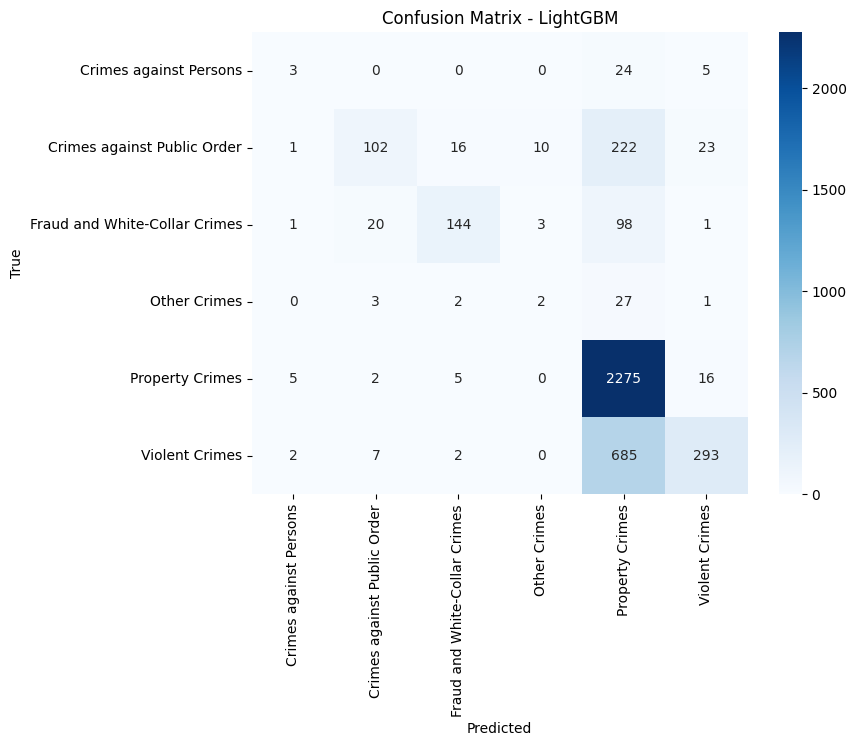

--------------------------------------------------


In [142]:
import time
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_processed and y are preprocessed features and target
# Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Function to train, evaluate and perform cross-validation
def train_and_evaluate_with_cv(model, model_name):
    start_train = time.time()

    # Cross-validation accuracy
    cv_scores = cross_val_score(model, X_train_processed, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)

    # Fit the model and make predictions
    model.fit(X_train_processed, y_train)
    end_train = time.time()

    start_pred = time.time()
    y_pred = model.predict(X_test_processed)
    end_pred = time.time()

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Model: {model_name}")
    print(f"Cross-Validation Accuracy: {mean_cv_score:.4f} ± {std_cv_score:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Training Time: {end_train - start_train:.4f} seconds")
    print(f"Prediction Time: {end_pred - start_pred:.4f} seconds")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix (Matrix format):\n", cm)

    # Confusion Matrix (Heatmap)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    print("-" * 50)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
#train_and_evaluate_with_cv(log_reg, "Logistic Regression")

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
#train_and_evaluate_with_cv(dt, "Decision Tree")

# LightGBM
lgb_train = lgb.Dataset(X_train_processed, y_train)
lgb_test = lgb.Dataset(X_test_processed, y_test, reference=lgb_train)

params = {
    'objective': 'multiclass',
    'num_class': y.nunique(),
    'learning_rate': 0.1,
    'max_depth': 6,
    'num_leaves': 31,
    'metric': 'multi_logloss'
}

start_train = time.time()
lgb_model = lgb.train(
    params,
    lgb_train,
    num_boost_round=100,
    valid_sets=[lgb_test],
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)
end_train = time.time()

start_pred = time.time()
y_pred_prob = lgb_model.predict(X_test_processed)
y_pred = y_pred_prob.argmax(axis=1)
end_pred = time.time()

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Cross-validation for LightGBM
cv_scores_lgb = cross_val_score(lgb.LGBMClassifier(**params), X_train_processed, y_train, cv=5)
mean_cv_score_lgb = np.mean(cv_scores_lgb)
std_cv_score_lgb = np.std(cv_scores_lgb)

print(f"Model: LightGBM")
print(f"Cross-Validation Accuracy: {mean_cv_score_lgb:.4f} ± {std_cv_score_lgb:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Training Time: {end_train - start_train:.4f} seconds")
print(f"Prediction Time: {end_pred - start_pred:.4f} seconds")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix for LightGBM
cm_lgb = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Matrix format):\n", cm_lgb)

# Confusion Matrix (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f"Confusion Matrix - LightGBM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("-" * 50)


Model: Gradient Boosting Classifier
Cross-Validation Accuracy: 0.8719 ± 0.0030
Accuracy: 0.8802
F1 Score: 0.8759
Training Time: 3371.7856 seconds
Prediction Time: 0.2201 seconds
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.56      0.55        32
           1       0.72      0.59      0.65       374
           2       0.82      0.78      0.80       267
           3       0.18      0.06      0.09        35
           4       0.94      0.93      0.93      2303
           5       0.83      0.94      0.88       989

    accuracy                           0.88      4000
   macro avg       0.67      0.64      0.65      4000
weighted avg       0.88      0.88      0.88      4000

Confusion Matrix (Matrix format):
 [[  18    1    1    0    0   12]
 [   5  219   21    2   60   67]
 [   1   29  209    2   26    0]
 [   0    6    9    2   18    0]
 [   2   38   12    2 2139  110]
 [   8   11    3    3   30  934]]


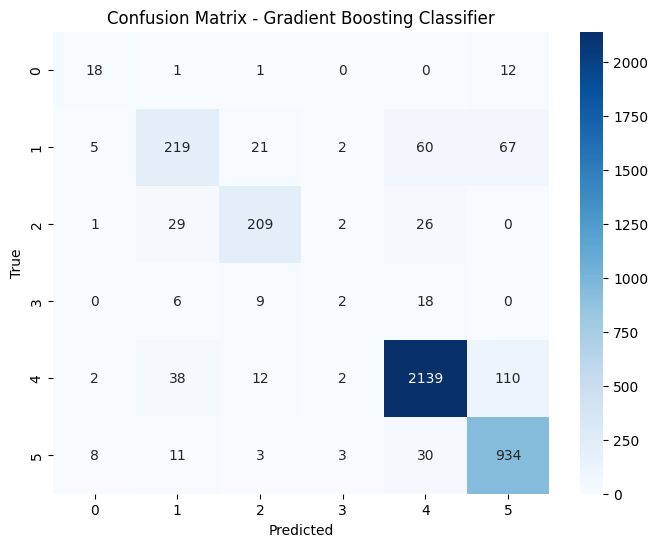

--------------------------------------------------


In [108]:
import time
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_processed and y are preprocessed features and target
# Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Function to train, evaluate and perform cross-validation
def train_and_evaluate_with_cv(model, model_name):
    start_train = time.time()

    # Cross-validation accuracy
    cv_scores = cross_val_score(model, X_train_processed, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)

    # Fit the model and make predictions
    model.fit(X_train_processed, y_train)
    end_train = time.time()

    start_pred = time.time()
    y_pred = model.predict(X_test_processed)
    end_pred = time.time()

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Model: {model_name}")
    print(f"Cross-Validation Accuracy: {mean_cv_score:.4f} ± {std_cv_score:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Training Time: {end_train - start_train:.4f} seconds")
    print(f"Prediction Time: {end_pred - start_pred:.4f} seconds")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix (Matrix format):\n", cm)

    # Confusion Matrix (Heatmap)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    print("-" * 50)

# Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
train_and_evaluate_with_cv(gbc, "Gradient Boosting Classifier")


**Remove Weapon_Description**

In [109]:
train_data_as_is.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               20000 non-null  object  
 1   Cross_Street           20000 non-null  object  
 2   Latitude               20000 non-null  float64 
 3   Longitude              20000 non-null  float64 
 4   Reported-Occured       20000 non-null  int64   
 5   Area_ID                20000 non-null  object  
 6   Reporting_District_no  20000 non-null  object  
 7   Part 1-2               20000 non-null  object  
 8   Modus_Operandi         17259 non-null  object  
 9   Victim_Age             20000 non-null  float64 
 10  Victim_Sex             20000 non-null  object  
 11  Victim_Descent         20000 non-null  object  
 12  Premise_Code           20000 non-null  object  
 13  Weapon_Used_Code       7335 non-null   object  
 14  Weapon_Description     7335 non-null  

In [110]:
train_data_nwd = copy.deepcopy(train_data_as_is)

In [111]:
train_data_nwd.drop(columns=['Weapon_Used_Code','Weapon_Description'],inplace=True,axis=1)

In [112]:
train_data_nwd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               20000 non-null  object  
 1   Cross_Street           20000 non-null  object  
 2   Latitude               20000 non-null  float64 
 3   Longitude              20000 non-null  float64 
 4   Reported-Occured       20000 non-null  int64   
 5   Area_ID                20000 non-null  object  
 6   Reporting_District_no  20000 non-null  object  
 7   Part 1-2               20000 non-null  object  
 8   Modus_Operandi         17259 non-null  object  
 9   Victim_Age             20000 non-null  float64 
 10  Victim_Sex             20000 non-null  object  
 11  Victim_Descent         20000 non-null  object  
 12  Premise_Code           20000 non-null  object  
 13  Status                 20000 non-null  object  
 14  Crime_Category         20000 non-null 

In [113]:
# Group by 'Area_ID' and get the mode of 'Modus_Operandi' for each group
mode_modus_operandi_by_area = train_data_nwd.groupby('Area_ID')['Modus_Operandi'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'N/A')  # Handle empty modes

# Impute missing values in 'Modus_Operandi' based on the mode for the corresponding 'Area_ID'
for area_id, mode_modus in mode_modus_operandi_by_area.items():
    train_data_nwd.loc[(train_data_nwd['Modus_Operandi'].isnull()) & (train_data_nwd['Area_ID'] == area_id), 'Modus_Operandi'] = mode_modus

# Verify if there are still any null values in 'Modus_Operandi'
print("Null values in Modus_Operandi after imputation:", train_data_nwd['Modus_Operandi'].isnull().sum())

Null values in Modus_Operandi after imputation: 0


In [114]:
# Calculate the mean age for each crime category (excluding negative ages)
mean_age_by_category = train_data_nwd[train_data_zero_impute['Victim_Age'] >= 0].groupby('Crime_Category')['Victim_Age'].mean()

# Impute negative ages with the mean for their respective category
for category, mean_age in mean_age_by_category.items():
    train_data_nwd.loc[(train_data_nwd['Victim_Age'] < 0) & (train_data_nwd['Crime_Category'] == category), 'Victim_Age'] = mean_age

# Verify the imputation
print("Null values in Victim_Age after imputation:", train_data_nwd['Victim_Age'].isnull().sum())
print("Number of Victim Age values less than 0:", (train_data_nwd['Victim_Age'] < 0).sum())

Null values in Victim_Age after imputation: 0
Number of Victim Age values less than 0: 0


In [115]:
final_columns = ['Location', 'Reported-Occured', 'Area_ID', 'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age', 'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Status', 'Reported_bins','Time_Occurred_Label','Crime_Category']

In [116]:
selected_data_nwd = train_data_nwd[final_columns]

In [117]:
selected_data_nwd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               20000 non-null  object  
 1   Reported-Occured       20000 non-null  int64   
 2   Area_ID                20000 non-null  object  
 3   Reporting_District_no  20000 non-null  object  
 4   Part 1-2               20000 non-null  object  
 5   Modus_Operandi         20000 non-null  object  
 6   Victim_Age             20000 non-null  float64 
 7   Victim_Sex             20000 non-null  object  
 8   Victim_Descent         20000 non-null  object  
 9   Premise_Code           20000 non-null  object  
 10  Status                 20000 non-null  object  
 11  Reported_bins          20000 non-null  category
 12  Time_Occurred_Label    20000 non-null  category
 13  Crime_Category         20000 non-null  object  
dtypes: category(2), float64(1), int64(1), 

In [118]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Create a copy to avoid modifying the original DataFrame
data = selected_data_nwd.copy()

# Step 1: Explicitly convert columns to the correct types
categorical_features = ['Location', 'Area_ID', 'Reporting_District_no', 'Part 1-2',
                        'Modus_Operandi', 'Victim_Sex', 'Victim_Descent',
                        'Status', 'Reported_bins', 'Time_Occurred_Label', 'Premise_Code']
numerical_features = ['Victim_Age', 'Reported-Occured']
target_feature = 'Crime_Category'

# Step 2: Label encode categorical features
label_encoder = LabelEncoder()

for col in categorical_features:
    data[col] = label_encoder.fit_transform(data[col])

# Convert numerical columns to numeric values
data[numerical_features] = data[numerical_features].apply(pd.to_numeric, errors='coerce')

# Encode target variable (Crime_Category)
target_encoder = LabelEncoder()
data[target_feature] = target_encoder.fit_transform(data[target_feature])

# Step 3: Handle missing values after conversion
data[numerical_features] = data[numerical_features].fillna(0)  # Replace NaN with 0 for numerical columns

# Step 4: Define Preprocessing Pipeline
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standard scaling for numerical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', 'passthrough', categorical_features)  # Categorical features are already encoded
    ]
)

# Apply preprocessing to the data
X = data.drop(columns=[target_feature])  # Features
y = data[target_feature]  # Target

X_preprocessed = preprocessor.fit_transform(X)

# Convert preprocessed data back to a DataFrame (optional, for compatibility)
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=numerical_features + categorical_features)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed_df, y, test_size=0.2, random_state=42
)

# Step 6: Train LightGBM Model
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categorical_features)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    'objective': 'multiclass',  # Multiclass classification
    'num_class': y.nunique(),  # Number of unique classes
    'learning_rate': 0.1,
    'max_depth': 6,
    'num_leaves': 31,
    'metric': 'multi_logloss',
    'verbose': -1
}

model = lgb.train(
    params,
    lgb_train,
    num_boost_round=100,
    valid_sets=[lgb_test],
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)

# Step 7: Evaluate Model
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f"LightGBM Model Accuracy: {accuracy:.4f}")
print(f"LightGBM Model F1 Score: {f1:.4f}")

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[32]	valid_0's multi_logloss: 0.531568
LightGBM Model Accuracy: 0.8070
LightGBM Model F1 Score: 0.7931


In [119]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import time

# Create a copy to avoid modifying the original DataFrame
data = selected_data_nwd.copy()

# Step 1: Explicitly convert columns to the correct types
categorical_features = ['Location', 'Area_ID', 'Reporting_District_no', 'Part 1-2',
                        'Modus_Operandi', 'Victim_Sex', 'Victim_Descent',
                        'Status', 'Reported_bins', 'Time_Occurred_Label', 'Premise_Code']
numerical_features = ['Victim_Age', 'Reported-Occured']
target_feature = 'Crime_Category'

# Step 2: Label encode target variable
target_encoder = LabelEncoder()
data[target_feature] = target_encoder.fit_transform(data[target_feature])

# Step 3: Handle missing values
data[numerical_features] = data[numerical_features].apply(pd.to_numeric, errors='coerce')
data[numerical_features] = data[numerical_features].fillna(0)  # Replace NaN with 0 for numerical columns

# Step 4: Define Preprocessing Pipeline
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standard scaling for numerical features
])

# One-hot encoding for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))  # Drop first to avoid multicollinearity
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)  # Apply one-hot encoding to categorical features
    ]
)

# Apply preprocessing to the data
X = data.drop(columns=[target_feature])  # Features
y = data[target_feature]  # Target

X_preprocessed = preprocessor.fit_transform(X)

# Step 5: Convert back to DataFrame (optional)
# One-hot encoding will create a sparse matrix, so convert it to a dense DataFrame for compatibility
X_preprocessed_df = pd.DataFrame(X_preprocessed.toarray(), columns=preprocessor.get_feature_names_out())

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed_df, y, test_size=0.2, random_state=42
)

# Step 7: Train LightGBM Model
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    'objective': 'multiclass',  # Multiclass classification
    'num_class': y.nunique(),  # Number of unique classes
    'learning_rate': 0.1,
    'max_depth': 6,
    'num_leaves': 31,
    'metric': 'multi_logloss',
    'verbose': -1
}
start_train = time.time()
model = lgb.train(
    params,
    lgb_train,
    num_boost_round=100,
    valid_sets=[lgb_test],
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)

end = time.time()
print(f"Training Time: {end - start_train:.4f} seconds")

# Step 8: Evaluate Model
start_pred = time.time()
y_pred = model.predict(X_test)

end_pred = time.time()
print(f"Prediction Time: {end_pred - start_pred:.4f} seconds")
y_pred_classes = y_pred.argmax(axis=1)
accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print(f"LightGBM Model Accuracy: {accuracy:.4f}")
print(f"LightGBM Model F1 Score: {f1:.4f}")

Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[98]	valid_0's multi_logloss: 0.537234
Training Time: 7.3628 seconds
Prediction Time: 0.2320 seconds
LightGBM Model Accuracy: 0.7993
LightGBM Model F1 Score: 0.7802


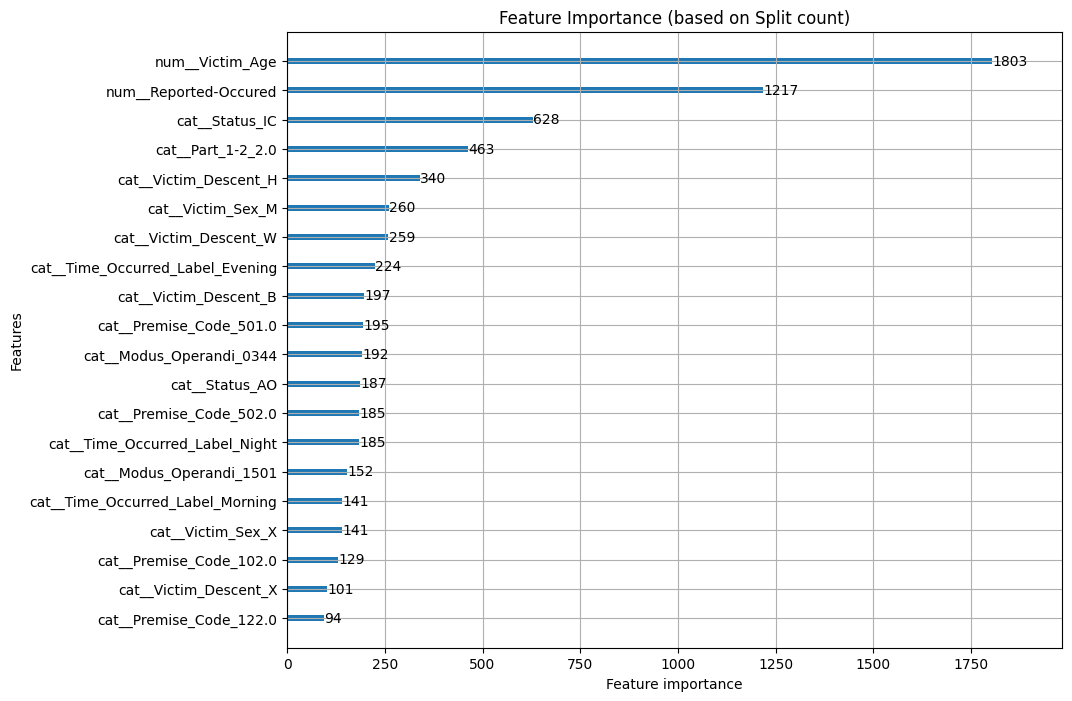

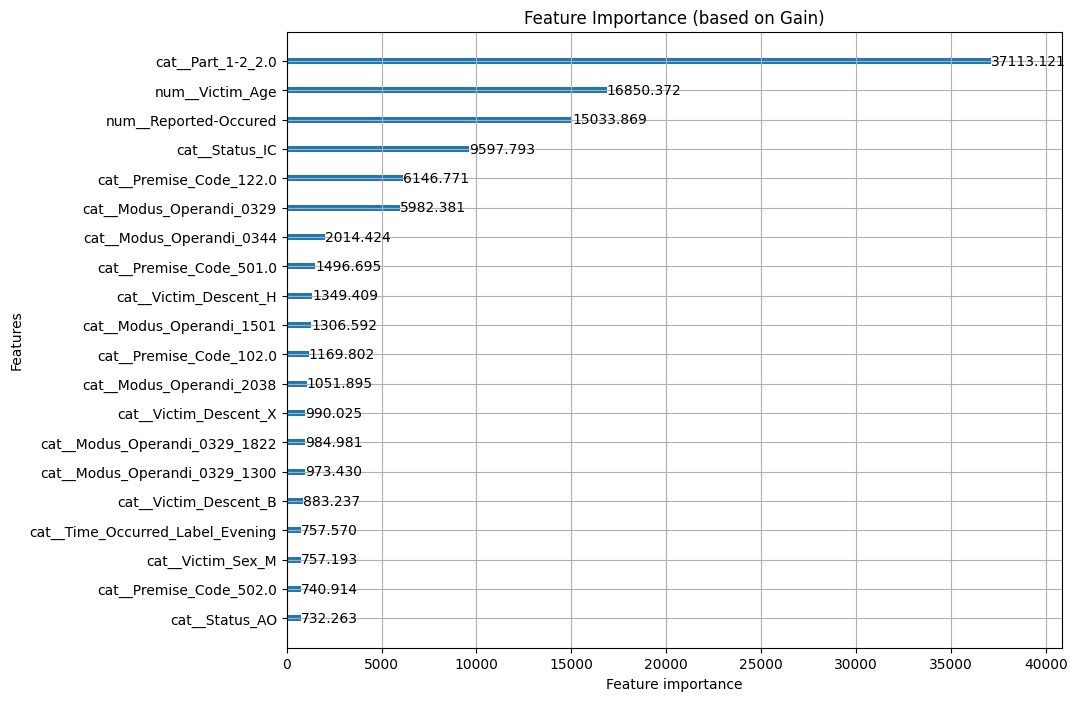

In [120]:
import lightgbm as lgb
import matplotlib.pyplot as plt

# Plot the feature importance
lgb.plot_importance(model, max_num_features=20, importance_type='split', figsize=(10, 8))
plt.title('Feature Importance (based on Split count)')
plt.show()

# Alternatively, for feature importance based on the gain (contribution to model improvement)
lgb.plot_importance(model, max_num_features=20, importance_type='gain', figsize=(10, 8))
plt.title('Feature Importance (based on Gain)')
plt.show()

In [122]:
import pandas as pd

# Assuming 'train_data' is your DataFrame and 'location' is the column to be cleaned


# Step 1: Strip leading/trailing spaces and replace multiple spaces with a single space
selected_data_nwd['Location'] = selected_data_nwd['Location'].str.strip()  # Remove leading/trailing spaces
selected_data_nwd['Location'] = selected_data_nwd['Location'].str.replace(r'\s+', ' ', regex=True)  # Replace multiple spaces with one

# Step 2: Convert all text to lowercase for uniformity (to handle case inconsistencies)
selected_data_nwd['Location'] = selected_data_nwd['Location'].str.lower()

# Step 3: Capitalize the first letter of each word (title case)
selected_data_nwd['Location'] = selected_data_nwd['Location'].str.title()

# Step 4: If needed, replace specific known abbreviations or text patterns
# Example: Replace "Av" with "Ave"
#train_data['location'] = train_data['location'].str.replace(' Av', ' Ave')

# Display the cleaned 'location' column
print(selected_data_nwd['Location'])


0                     4500 Carpenter Av
1                               45Th St
2        600 E Martin Luther King Jr Bl
3                   14900 Oro Grande St
4                     7100 S Vermont Av
                      ...              
19995                   5100 W Adams Bl
19996                   16900 Roscoe Bl
19997              1000 S Shenandoah St
19998                300 W Sepulveda St
19999                         Dalton Av
Name: Location, Length: 20000, dtype: object


C:\Users\Laddu\AppData\Local\Temp\ipykernel_1072\3712372176.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_nwd['Location'] = selected_data_nwd['Location'].str.strip()  # Remove leading/trailing spaces
C:\Users\Laddu\AppData\Local\Temp\ipykernel_1072\3712372176.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_nwd['Location'] = selected_data_nwd['Location'].str.replace(r'\s+', ' ', regex=True)  # Replace multiple spaces with one
C:\Users\Laddu\AppData\Local\Temp\ipykernel_1

In [123]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Define feature groups
categorical_high_card = ['Location', 'Modus_Operandi']
categorical_moderate_card = ['Reporting_District_no', 'Premise_Code']
categorical_low_card = ['Area_ID', 'Victim_Sex', 'Victim_Descent',
                        'Status', 'Reported_bins', 'Time_Occurred_Label']
numerical_features = ['Reported-Occured', 'Victim_Age']
ordinal_feature = ['Part 1-2']
target_feature = 'Crime_Category'

# Encode target variable
label_encoder = LabelEncoder()
selected_data_nwd[target_feature] = label_encoder.fit_transform(selected_data_nwd[target_feature])

# Frequency encoding for high-cardinality features
for col in categorical_high_card:
    freq_encoding = selected_data_nwd[col].value_counts().to_dict()
    selected_data_nwd[col] = selected_data_nwd[col].map(freq_encoding)

# Preprocessing pipelines
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
numerical_transformer = StandardScaler()
ordinal_transformer = OrdinalEncoder()  # Specify the order explicitly

# Combine transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('ord', ordinal_transformer, ordinal_feature),
        ('cat_moderate', categorical_transformer, categorical_moderate_card),
        ('cat_low', categorical_transformer, categorical_low_card)
    ],
    remainder='passthrough'  # Keeps frequency-encoded high-cardinality features
)

# Apply transformations
X = selected_data_nwd.drop(columns=[target_feature])
y = selected_data_nwd[target_feature]

X_processed = preprocessor.fit_transform(X)

# X_processed is ready for training

C:\Users\Laddu\AppData\Local\Temp\ipykernel_1072\288309590.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_nwd[target_feature] = label_encoder.fit_transform(selected_data_nwd[target_feature])
C:\Users\Laddu\AppData\Local\Temp\ipykernel_1072\288309590.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data_nwd[col] = selected_data_nwd[col].map(freq_encoding)
C:\Users\Laddu\AppData\Local\Temp\ipykernel_1072\288309590.py:21: SettingWithCopyWarning: 
A value is trying to be set on 

C:\Users\Laddu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Laddu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Model: LogisticRegression
CV Mean Accuracy: 0.7595 ± 0.0028
Accuracy: 0.7585
F1 Score (weighted): 0.7314
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.09      0.15        32
           1       0.43      0.09      0.15       374
           2       0.73      0.60      0.66       267
           3       0.00      0.00      0.00        35
           4       0.86      0.90      0.88      2303
           5       0.59      0.77      0.67       989

    accuracy                           0.76      4000
   macro avg       0.51      0.41      0.42      4000
weighted avg       0.73      0.76      0.73      4000



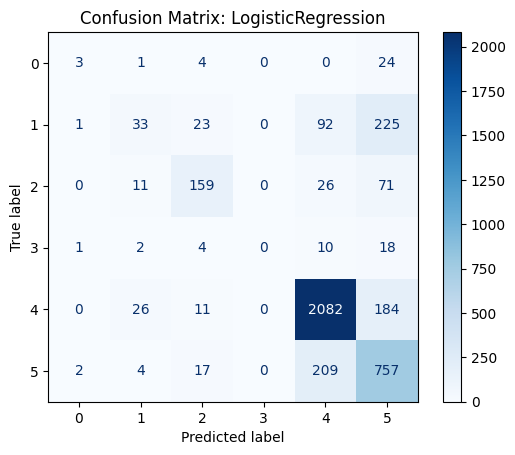

Training Time: 85.6786 seconds
Prediction Time: 0.0394 seconds

Model: DecisionTreeClassifier
CV Mean Accuracy: 0.7626 ± 0.0073
Accuracy: 0.7528
F1 Score (weighted): 0.7482
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.59      0.57        32
           1       0.38      0.30      0.34       374
           2       0.69      0.68      0.68       267
           3       0.14      0.09      0.11        35
           4       0.88      0.89      0.89      2303
           5       0.61      0.65      0.63       989

    accuracy                           0.75      4000
   macro avg       0.54      0.53      0.53      4000
weighted avg       0.74      0.75      0.75      4000



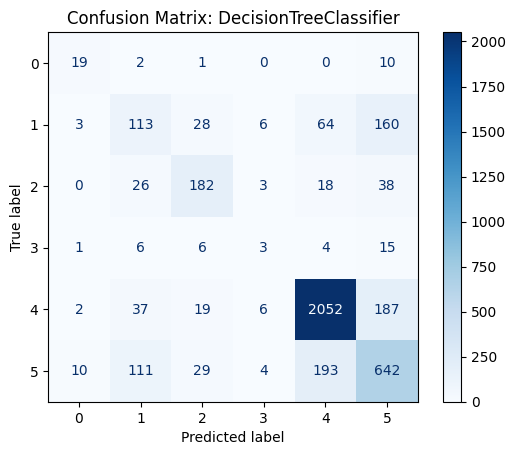

Training Time: 3.9438 seconds
Prediction Time: 0.0221 seconds

Model: LGBMClassifier
CV Mean Accuracy: 0.8101 ± 0.0051
Accuracy: 0.8145
F1 Score (weighted): 0.8016
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.72      0.70        32
           1       0.68      0.26      0.38       374
           2       0.83      0.78      0.80       267
           3       0.18      0.06      0.09        35
           4       0.90      0.92      0.91      2303
           5       0.67      0.81      0.73       989

    accuracy                           0.81      4000
   macro avg       0.66      0.59      0.60      4000
weighted avg       0.81      0.81      0.80      4000



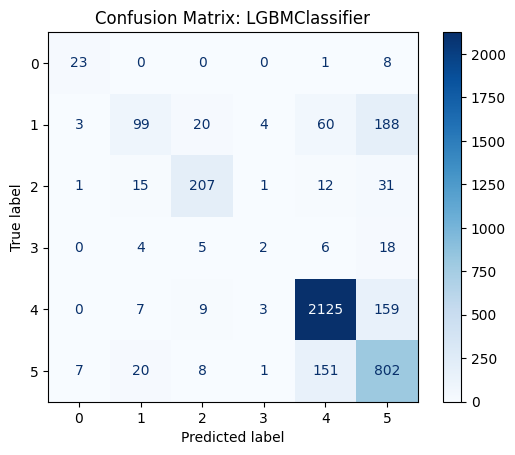

Training Time: 1.4734 seconds
Prediction Time: 0.1213 seconds



In [132]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming X_processed is the preprocessed feature set and y is the target
X = X_processed  # This is the preprocessed features
y = selected_data_nwd[target_feature]  # Target variable

# Split the dataset for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test, cv=5):
    # Timing the training phase
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Timing the prediction phase
    start_time = time.time()
    y_pred = model.predict(X_test)
    prediction_time = time.time() - start_time

    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    mean_cv_score = np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)
    
    # Accuracy and F1 Score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Classification Report
    class_report = classification_report(y_test, y_pred)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    # Results printout
    print(f"Model: {model.__class__.__name__}")
    print(f"CV Mean Accuracy: {mean_cv_score:.4f} ± {std_cv_score:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score (weighted): {f1:.4f}")
    print("Classification Report:\n", class_report)
    
    # Confusion Matrix plot
    cm_display.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix: {model.__class__.__name__}")
    plt.show()
    
    print(f"Training Time: {training_time:.4f} seconds")
    print(f"Prediction Time: {prediction_time:.4f} seconds\n")
    
    return accuracy, f1, cm

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg_acc, log_reg_f1, log_reg_cm = evaluate_model(log_reg, X_train, y_train, X_test, y_test)

# Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree_acc, dtree_f1, dtree_cm = evaluate_model(dtree, X_train, y_train, X_test, y_test)

# LightGBM
lgbm = lgb.LGBMClassifier(random_state=42)
lgbm_acc, lgbm_f1, lgbm_cm = evaluate_model(lgbm, X_train, y_train, X_test, y_test)


In [133]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


# Train the model
start = time.time()
gbc.fit(X_train, y_train)
end = time.time()

print("Train Time" , end-start)
# Make predictions on the test set
start = time.time()
y_pred = gbc.predict(X_test)
end = time.time()

print("Pred time ", end-start)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
f1_score = f1_score(y_test, y_pred,average='weighted')
print(f"F1: {f1_score:.4f}")

Train Time 706.6193964481354
Pred time  0.1127924919128418
Accuracy: 0.7907
F1: 0.7726


In [128]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
import pandas as pd

# Define feature groups
categorical_high_card = ['Location', 'Modus_Operandi']
categorical_moderate_card = ['Reporting_District_no', 'Premise_Code']
categorical_low_card = ['Area_ID', 'Victim_Sex', 'Victim_Descent', 
                         'Status', 'Reported_bins', 'Time_Occurred_Label']
numerical_features = ['Reported-Occured', 'Victim_Age']
ordinal_feature = ['Part 1-2']
target_feature = 'Crime_Category'

# Split the dataset into features (X) and target (y)
X = selected_data_nwd.drop(columns=[target_feature])
y = selected_data_nwd[target_feature]

# Encode target variable using LabelEncoder (y_train and y_test should be encoded)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Apply encoding to entire target variable

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Target Encoding for High Cardinality Features (on the training set)
target_encoder = TargetEncoder()
for col in categorical_high_card:
    X_train[col] = target_encoder.fit_transform(X_train[col], y_train)
    X_test[col] = target_encoder.transform(X_test[col])  # Apply the encoding on the test set

# Preprocessing pipelines for other features
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
numerical_transformer = StandardScaler()
ordinal_transformer = OrdinalEncoder()  # Specify the order explicitly if necessary

# Combine transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('ord', ordinal_transformer, ordinal_feature),
        ('cat_moderate', categorical_transformer, categorical_moderate_card),
        ('cat_low', categorical_transformer, categorical_low_card)
    ],
    remainder='passthrough'  # Keeps target-encoded high-cardinality features in the transformed data
)

# Apply transformations to both the training and testing sets
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Check the processed data
print("Processed training data shape:", X_train_processed.shape)
print("Processed test data shape:", X_test_processed.shape)

# Now you can proceed with training your models


Processed training data shape: (16000, 1379)
Processed test data shape: (4000, 1379)


C:\Users\Laddu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Laddu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Model: Logistic Regression
Cross-Validation Accuracy: 0.7584 ± 0.0030
Accuracy: 0.7572
F1 Score: 0.7301
Training Time: 552.4746 seconds
Prediction Time: 0.0366 seconds
Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.09      0.14        32
           1       0.37      0.08      0.14       374
           2       0.70      0.61      0.65       267
           3       0.00      0.00      0.00        35
           4       0.86      0.91      0.88      2303
           5       0.60      0.76      0.67       989

    accuracy                           0.76      4000
   macro avg       0.47      0.41      0.41      4000
weighted avg       0.73      0.76      0.73      4000

Confusion Matrix (Matrix format):
 [[   3    1    4    0    0   24]
 [   2   31   24    0   99  218]
 [   0   13  162    0   28   64]
 [   1    2    5    0    9   18]
 [   1   26   14    0 2085  177]
 [   3   10   21    0  207  748]]


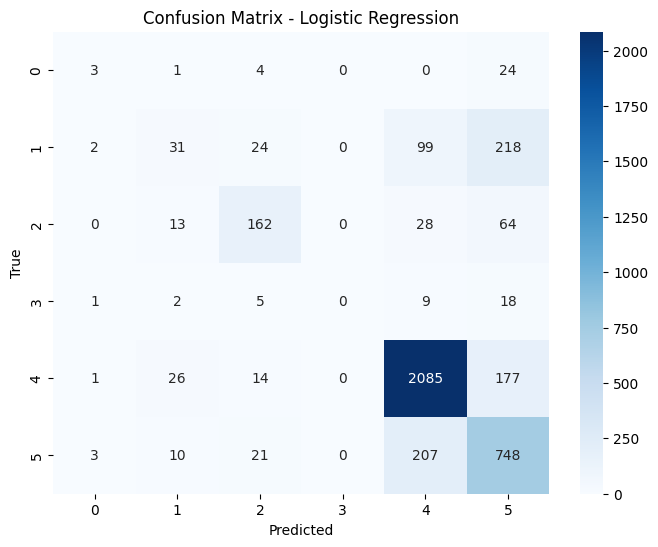

--------------------------------------------------
Model: Decision Tree
Cross-Validation Accuracy: 0.7620 ± 0.0021
Accuracy: 0.7608
F1 Score: 0.7559
Training Time: 33.1889 seconds
Prediction Time: 0.0502 seconds
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.59      0.52        32
           1       0.41      0.32      0.36       374
           2       0.72      0.70      0.71       267
           3       0.16      0.09      0.11        35
           4       0.88      0.90      0.89      2303
           5       0.62      0.66      0.64       989

    accuracy                           0.76      4000
   macro avg       0.54      0.54      0.54      4000
weighted avg       0.75      0.76      0.76      4000

Confusion Matrix (Matrix format):
 [[  19    1    1    0    0   11]
 [   5  120   25    6   61  157]
 [   3   26  186    0   17   35]
 [   1    7    6    3    5   13]
 [   1   38   16   10 2062  176]
 [  12  103   24    0

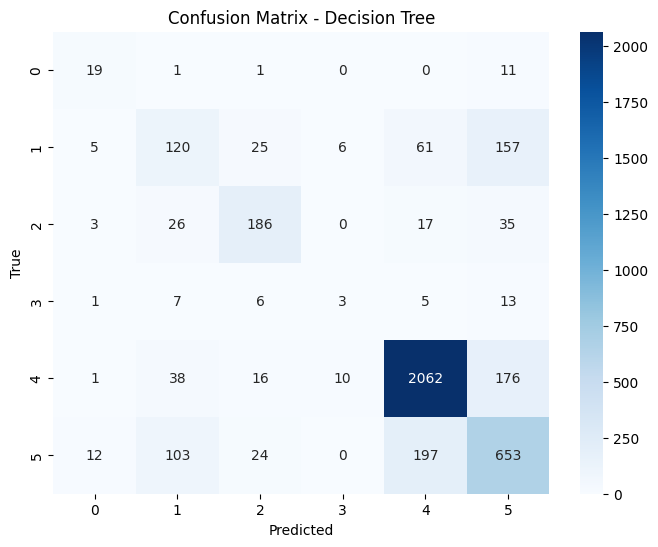

--------------------------------------------------
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[55]	valid_0's multi_logloss: 0.519166
Model: LightGBM
Accuracy: 0.8035
F1 Score: 0.7878
Training Time: 2.8563 seconds
Prediction Time: 0.1164 seconds
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.69      0.67        32
           1       0.67      0.22      0.33       374
           2       0.83      0.77      0.80       267
           3       0.18      0.06      0.09        35
           4       0.89      0.92      0.91      2303
           5       0.65      0.79      0.71       989

    accuracy                           0.80      4000
   macro avg       0.64      0.57      0.58      4000
weighted avg       0.80      0.80      0.79      4000

Confusion Matrix (Matrix format):
 [[  22    0    0    0    0   10]
 [   4   81   19    4   70  196]
 [   1   15  206    1   10   34]
 

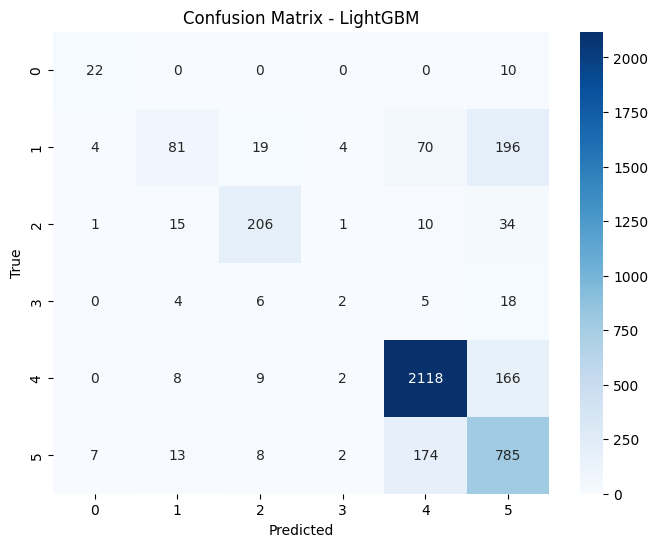

--------------------------------------------------


In [129]:
import time
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_encoded and y are preprocessed features and target
# Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Function to train and evaluate a model with cross-validation and confusion matrix
def train_and_evaluate_with_cv(model, model_name):
    start_train = time.time()

    # Cross-validation accuracy
    cv_scores = cross_val_score(model, X_train_processed, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)

    # Fit the model and make predictions
    model.fit(X_train_processed, y_train)
    end_train = time.time()

    start_pred = time.time()
    y_pred = model.predict(X_test_processed)
    end_pred = time.time()

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Model: {model_name}")
    print(f"Cross-Validation Accuracy: {mean_cv_score:.4f} ± {std_cv_score:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Training Time: {end_train - start_train:.4f} seconds")
    print(f"Prediction Time: {end_pred - start_pred:.4f} seconds")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix (Matrix format):\n", cm)

    # Confusion Matrix (Heatmap)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    print("-" * 50)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
train_and_evaluate_with_cv(log_reg, "Logistic Regression")

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
train_and_evaluate_with_cv(dt, "Decision Tree")

# LightGBM (with cross-validation and confusion matrix)
lgb_train = lgb.Dataset(X_train_processed, y_train)
lgb_test = lgb.Dataset(X_test_processed, y_test, reference=lgb_train)

params = {
    'objective': 'multiclass',
    'num_class': y.nunique(),
    'learning_rate': 0.1,
    'max_depth': 6,
    'num_leaves': 31,
    'metric': 'multi_logloss'
}

start_train = time.time()
lgb_model = lgb.train(
    params,
    lgb_train,
    num_boost_round=100,
    valid_sets=[lgb_test],
    callbacks=[lgb.early_stopping(stopping_rounds=10)]
)
end_train = time.time()

start_pred = time.time()
y_pred_prob = lgb_model.predict(X_test_processed)
y_pred = y_pred_prob.argmax(axis=1)
end_pred = time.time()

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Model: LightGBM")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Training Time: {end_train - start_train:.4f} seconds")
print(f"Prediction Time: {end_pred - start_pred:.4f} seconds")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix for LightGBM
cm_lgb = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Matrix format):\n", cm_lgb)

# Confusion Matrix (Heatmap for LightGBM)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f"Confusion Matrix - LightGBM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("-" * 50)


Model: LightGBM
Cross-Validation Accuracy: 0.8092 ± 0.0041
Accuracy: 0.8053
F1 Score: 0.7903
Training Time: 6.5232 seconds
Prediction Time: 0.1093 seconds
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.72      0.70        32
           1       0.66      0.23      0.34       374
           2       0.84      0.76      0.80       267
           3       0.18      0.06      0.09        35
           4       0.89      0.92      0.91      2303
           5       0.65      0.80      0.72       989

    accuracy                           0.81      4000
   macro avg       0.65      0.58      0.59      4000
weighted avg       0.80      0.81      0.79      4000

Confusion Matrix (Matrix format):
 [[  23    0    0    0    0    9]
 [   4   85   19    4   68  194]
 [   1   16  203    1   11   35]
 [   0    4    5    2    6   18]
 [   0   10    9    2 2117  165]
 [   6   14    6    2  170  791]]


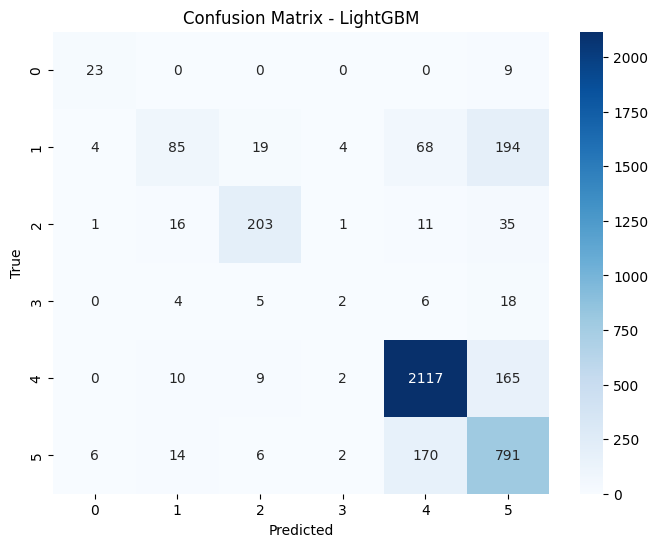

--------------------------------------------------


In [131]:
import time
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_encoded and y are preprocessed features and target
# Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Function to train and evaluate LightGBM with cross-validation and confusion matrix
def train_and_evaluate_lightgbm_with_cv(model, model_name):
    start_train = time.time()

    # Cross-validation accuracy
    cv_scores = cross_val_score(model, X_train_processed, y_train, cv=5, scoring='accuracy')
    mean_cv_score = np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)

    # Print cross-validation results
    print(f"Model: {model_name}")
    print(f"Cross-Validation Accuracy: {mean_cv_score:.4f} ± {std_cv_score:.4f}")
    
    # Fit the model and make predictions
    model.fit(X_train_processed, y_train)
    end_train = time.time()

    start_pred = time.time()
    y_pred = model.predict(X_test_processed)
    end_pred = time.time()

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Training Time: {end_train - start_train:.4f} seconds")
    print(f"Prediction Time: {end_pred - start_pred:.4f} seconds")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix (Matrix format):\n", cm)

    # Confusion Matrix (Heatmap)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    print("-" * 50)

# LightGBM (with cross-validation and confusion matrix)
lgb_train = lgb.Dataset(X_train_processed, y_train)
lgb_test = lgb.Dataset(X_test_processed, y_test, reference=lgb_train)

params = {
    'objective': 'multiclass',
    'num_class': y.nunique(),
    'learning_rate': 0.1,
    'max_depth': 6,
    'num_leaves': 31,
    'metric': 'multi_logloss'
}

# Create a LightGBM model
lgb_model = lgb.LGBMClassifier(**params)

# Using cross-validation to estimate model performance
train_and_evaluate_lightgbm_with_cv(lgb_model, "LightGBM")


In [287]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


# Train the model
start = time.time()
gbc.fit(X_train_processed, y_train)
end = time.time()

print("Train Time" , end-start)
# Make predictions on the test set
start = time.time()
y_pred = gbc.predict(X_test_processed)
end = time.time()

print("Pred time ", end-start)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
f1_score = f1_score(y_test, y_pred,average='weighted')
print(f"F1: {f1_score:.4f}")

Train Time 1161.0729026794434
Pred time  0.20967459678649902
Accuracy: 0.7895
F1: 0.7713
